In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [6]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

OUTPUT_DIR = '/home/d/PERCEPTION/DATA/Figure1_Position_Nonaligned_Scale/'
if not os.path.exists(OUTPUT_DIR):
  os.makedirs(OUTPUT_DIR)

# Dataset 1

We create a very simple dataset without X variability. Also the spot size is constant.

This means, we only vary the Y position. 

In [5]:
#
# CREATE SINGLE DATAPOINT
#
fig = C.Figure1_Position_Nonaligned_Scale()
fig.create(verbose=True)

#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints)
print 'Image Generation done in', time.time()-t0, 'seconds'

AttributeError: 'module' object has no attribute 'Figure1_Position_Nonaligned_Scale'

Datapoint 75251
Label 41


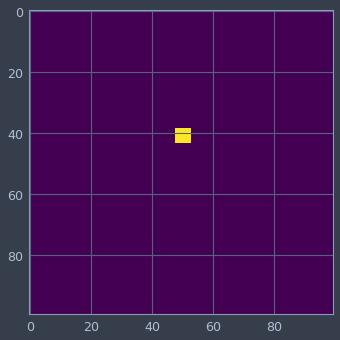

In [4]:
#
# RANDOM VISUALIZATION
#
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX]

plt.figure()
im = plt.imshow(images[INDEX])

# ax = plt.gca()

# ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
# ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
# ax.grid(which='minor')


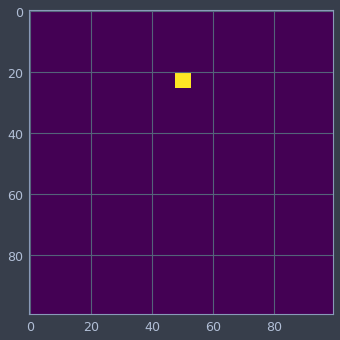

In [5]:
#
# DATA AS RAVELED NUMPY 2D ARRAY
#
images_raveled = images.reshape(100000,100*100).astype(np.float32)
images_raveled -= .5

a = images_raveled.reshape(100000,100,100)
imshow(a[16387])

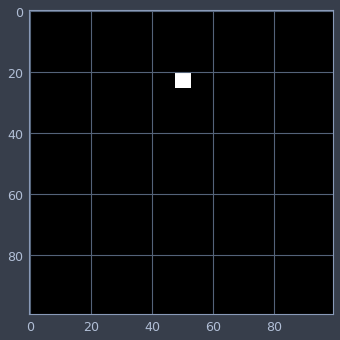

In [6]:
#
# WE ALSO NEED THE DATA AS A 3D NUMPY ARRAY (RAVELED)
#
images_3d = np.stack((images,)*3, -1)
images_3d_raveled = images_3d.reshape(100000, 100*100*3).astype(np.float32)
images_3d_raveled -= .5

a = images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

In [7]:
INDEX = 1

# let's store the datapoints
with open(OUTPUT_DIR+'datapoints_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(datapoints, f)
print 'stored datapoints'
with open(OUTPUT_DIR+'labels_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(labels, f)
print 'stored labels'
  
# Then, let's store the vanilla image data
#
# This data is randomized but matches the labels
# and is normalized to -.5 .. .5
np.save(OUTPUT_DIR+'images_'+str(INDEX)+'.npy', images_raveled, allow_pickle=False)
# .. now the vanilla images 3D
#np.save(OUTPUT_DIR+'images_rgb_'+str(INDEX)+'.npy', images_3d_raveled, allow_pickle=False)

print 'storeds image arrays 2d/3d numpy'

#
#
# OTHER CLASSIFIERS AS FEATURE GENERATORS
#
#
import keras.applications
X = images_3d_raveled.reshape(100000,100,100,3)


VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features done after', time.time()-t0

np.save(OUTPUT_DIR+'vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features done after', time.time()-t0

np.save(OUTPUT_DIR+'xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)


stored datapoints
stored labels
storeds image arrays 2d/3d numpy


Using TensorFlow backend.


100000/100000 [==============================] - 275s 3ms/step
VGG19 features done after 275.396472931
100000/100000 [==============================] - 219s 2ms/step
Xception features done after 219.240185022


# Dataset 2
We add X variability.

This means, we not only vary the Y coordinate but also the X coordinate.

In [8]:
#
# CREATE SINGLE DATAPOINT
#
fig = C.Figure1_Position_Common_Scale(variable_x=True)
fig.create(verbose=True)

#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints)
print 'Image Generation done in', time.time()-t0, 'seconds'

Creating Datapoints done in 1.46190404892 seconds
Image Generation done in 1.86163401604 seconds


Datapoint 18439
Label 59


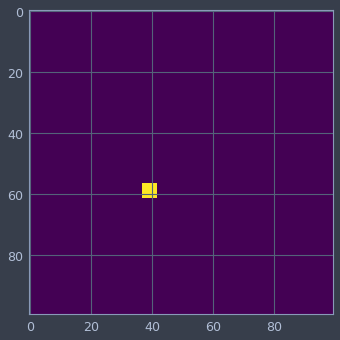

In [9]:
#
# RANDOM VISUALIZATION
#
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX]

imshow(images[INDEX])

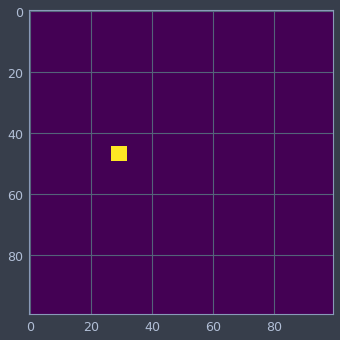

In [10]:
#
# DATA AS RAVELED NUMPY 2D ARRAY
#
images_raveled = images.reshape(100000,100*100).astype(np.float32)
images_raveled -= .5

a = images_raveled.reshape(100000,100,100)
imshow(a[16387])

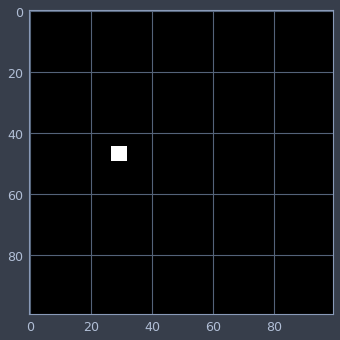

In [11]:
#
# WE ALSO NEED THE DATA AS A 3D NUMPY ARRAY (RAVELED)
#
images_3d = np.stack((images,)*3, -1)
images_3d_raveled = images_3d.reshape(100000, 100*100*3).astype(np.float32)
images_3d_raveled -= .5

a = images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

In [12]:
INDEX = 2

# let's store the datapoints
with open(OUTPUT_DIR+'datapoints_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(datapoints, f)
print 'stored datapoints'
with open(OUTPUT_DIR+'labels_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(labels, f)
print 'stored labels'
  
# Then, let's store the vanilla image data
#
# This data is randomized but matches the labels
# and is normalized to -.5 .. .5
np.save(OUTPUT_DIR+'images_'+str(INDEX)+'.npy', images_raveled, allow_pickle=False)
# .. now the vanilla images 3D
#np.save(OUTPUT_DIR+'images_rgb_'+str(INDEX)+'.npy', images_3d_raveled, allow_pickle=False)

print 'storeds image arrays 2d/3d numpy'

#
#
# OTHER CLASSIFIERS AS FEATURE GENERATORS
#
#
import keras.applications
X = images_3d_raveled.reshape(100000,100,100,3)


VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features done after', time.time()-t0

np.save(OUTPUT_DIR+'vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features done after', time.time()-t0

np.save(OUTPUT_DIR+'xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)


stored datapoints
stored labels
storeds image arrays 2d/3d numpy
100000/100000 [==============================] - 279s 3ms/step
VGG19 features done after 278.567987919
100000/100000 [==============================] - 221s 2ms/step
Xception features done after 220.780169964


# Dataset 3
We add also variable spot size in addition to X and Y variability.

This means, we not only vary the X and the Y coordinates, but also the spot size.

In [13]:
#
# CREATE SINGLE DATAPOINT
#
fig = C.Figure1_Position_Common_Scale(variable_x=True, variable_spot_size=True)
fig.create(verbose=True)

#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints)
print 'Image Generation done in', time.time()-t0, 'seconds'

Creating Datapoints done in 2.55482196808 seconds
Image Generation done in 1.36899209023 seconds


Datapoint 22905
Label 37


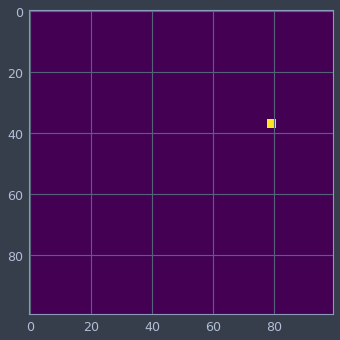

In [14]:
#
# RANDOM VISUALIZATION
#
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX]

imshow(images[INDEX])

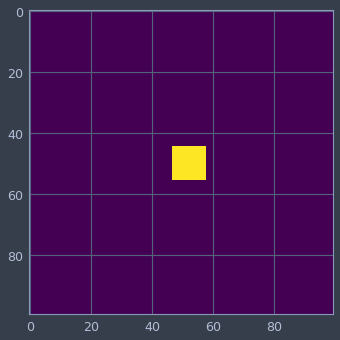

In [15]:
#
# DATA AS RAVELED NUMPY 2D ARRAY
#
images_raveled = images.reshape(100000,100*100).astype(np.float32)
images_raveled -= .5

a = images_raveled.reshape(100000,100,100)
imshow(a[16387])

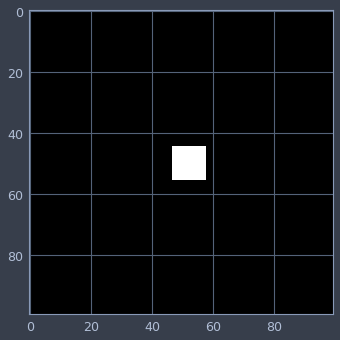

In [16]:
#
# WE ALSO NEED THE DATA AS A 3D NUMPY ARRAY (RAVELED)
#
images_3d = np.stack((images,)*3, -1)
images_3d_raveled = images_3d.reshape(100000, 100*100*3).astype(np.float32)
images_3d_raveled -= .5

a = images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

In [17]:
INDEX = 3

# let's store the datapoints
with open(OUTPUT_DIR+'datapoints_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(datapoints, f)
print 'stored datapoints'
with open(OUTPUT_DIR+'labels_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(labels, f)
print 'stored labels'
  
# Then, let's store the vanilla image data
#
# This data is randomized but matches the labels
# and is normalized to -.5 .. .5
np.save(OUTPUT_DIR+'images_'+str(INDEX)+'.npy', images_raveled, allow_pickle=False)
# .. now the vanilla images 3D
#np.save(OUTPUT_DIR+'images_rgb_'+str(INDEX)+'.npy', images_3d_raveled, allow_pickle=False)

print 'storeds image arrays 2d/3d numpy'

#
#
# OTHER CLASSIFIERS AS FEATURE GENERATORS
#
#
import keras.applications
X = images_3d_raveled.reshape(100000,100,100,3)


VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features done after', time.time()-t0

np.save(OUTPUT_DIR+'vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features done after', time.time()-t0

np.save(OUTPUT_DIR+'xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)


stored datapoints
stored labels
storeds image arrays 2d/3d numpy
100000/100000 [==============================] - 279s 3ms/step
VGG19 features done after 279.325987101
100000/100000 [==============================] - 221s 2ms/step
Xception features done after 220.716153145
